In [1]:
# import statement
from groq import Groq
from openai import OpenAI
from utils import stt_test, plot_model_comparison
import time
import os
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# parameters initialization
groq_client = Groq(
    api_key=os.environ["GROQ_API_KEY"],
)

openai_client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

models = ["whisper", "nova-2-general", "whisper-large-v3", "whisper-1"]

local_audios = [
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound0.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound1.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound2.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound3.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound4.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound5.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound6.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound7.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound8.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound9.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound10.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound11.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound12.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound13.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound14.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound15.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound16.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound17.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound18.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound19.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound20.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound21.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound22.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound23.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound24.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound25.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound26.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound27.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound28.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound29.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound30.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound31.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound32.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound33.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound34.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound35.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound36.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound37.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound38.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound39.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound40.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound41.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty0.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty1.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty2.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty0.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty1.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty2.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty0.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty1.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty2.m4a",
]

testing_texts = [
    "This is a test sentence.",
    "ÊµãËØïÊñáÊú¨„ÄÇ",
    "„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ",
    "The quick brown fox jumps over the lazy dog.",
    "‰ªäÂ§©Â§©Ê∞îÂæàÂ•Ω„ÄÇ",
    "Êò®Êó•„ÅÆÂ§©Ê∞ó„ÅØ„Å®„Å¶„ÇÇËâØ„Åã„Å£„Åü„Åß„Åô„ÄÇ",
    "Artificial intelligence is transforming industries.",
    "Êú∫Âô®Â≠¶‰π†ÊòØ‰∫∫Â∑•Êô∫ËÉΩÁöÑ‰∏Ä‰∏™ÂàÜÊîØ„ÄÇ",
    "Ê©üÊ¢∞Â≠¶Áøí„ÅØ‰∫∫Â∑•Áü•ËÉΩ„ÅÆ‰∏ÄÂàÜÈáé„Åß„Åô„ÄÇ",
    "Language models like GPT-4 are very powerful.",
    "‰∫∫Á±ªÂ∑≤ÁªèË∏è‰∏ä‰∫ÜÁÅ´Êòü„ÄÇ",
    "‰∫∫È°û„ÅØÊó¢„Å´ÁÅ´Êòü„Å´Ë∂≥„ÇíË∏è„ÅøÂÖ•„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ",
    "I have a dream that one day this nation will rise up and live out the true meaning of its creed.",
    "ÊòéÂ§©Êàë‰ª¨ÂéªÁà¨Â±±Âêß„ÄÇ",
    "ÊòéÊó•„ÅØÂ±±Áôª„Çä„Å´Ë°å„Åì„ÅÜ„ÄÇ",
    "The history of the world is the history of great men.",
    "Ëøô‰∏™È°πÁõÆÁöÑËøõÂ±ïÈùûÂ∏∏È°∫Âà©„ÄÇ",
    "„Åì„ÅÆ„Éó„É≠„Ç∏„Çß„ÇØ„Éà„ÅÆÈÄ≤Êçó„ÅØÈùûÂ∏∏„Å´È†ÜË™ø„Åß„Åô„ÄÇ",
    "In a hole in the ground there lived a hobbit.",
    "Êàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂ≠¶‰π†ÂèòÂæóÊõ¥Â•Ω„ÄÇ",
    "Â≠¶„Å∂„Åì„Å®„Å´„Çà„Å£„Å¶ÁßÅ„Åü„Å°„ÅØËâØ„Åè„Å™„Çä„Åæ„Åô„ÄÇ",
    "The greatest glory in living lies not in never falling, but in rising every time we fall.",
    "Âú®ËøΩÊ±ÇÊ¢¶ÊÉ≥ÁöÑÈÅìË∑Ø‰∏äÔºåÊàë‰ª¨‰∏çÂ∫îËΩªË®ÄÊîæÂºÉ„ÄÇ",
    "Â§¢„ÇíËøΩ„ÅÑÊ±Ç„ÇÅ„ÇãÈÅì„ÅÆ„Çä„Åß„ÅØ„ÄÅÁ∞°Âçò„Å´Ë´¶„ÇÅ„Çã„Åπ„Åç„Åß„ÅØ„ÅÇ„Çä„Åæ„Åõ„Çì„ÄÇ",
    "To be, or not to be, that is the question.",
    "ÊØè‰∏™‰∫∫ÈÉΩÊúâËá™Â∑±ÁöÑÊ¢¶ÊÉ≥„ÄÇ",
    "Ë™∞„ÇÇ„ÅåËá™ÂàÜ„ÅÆÂ§¢„ÇíÊåÅ„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ",
    "Success is not final, failure is not fatal: It is the courage to continue that counts.",
    "‰∫∫Áîü„ÅØÁü≠„ÅÑ„ÄÅ„Å†„Åã„ÇâÂ§¢„ÇíËøΩ„ÅÑ„Åã„Åë„Çã„Åπ„Åç„Åß„Åô„ÄÇ",
    "ÁîüÊ¥ªÊòØ‰∏ÄÂú∫ÂÜíÈô©ÔºåË¶ÅÊï¢‰∫éÂ∞ùËØïÊñ∞‰∫ãÁâ©„ÄÇ",
    "Some are born great, some achieve greatness, and some have greatness thrust upon them.",
    "Êó∂Èó¥ÊòØÊúÄÂÆùË¥µÁöÑË¥¢ÂØå„ÄÇ",
    "ÊôÇÈñì„ÅØÊúÄ„ÇÇË≤¥Èáç„Å™Ë≤°Áî£„Åß„Åô„ÄÇ",
    "The only thing we have to fear is fear itself.",
    "‰∏∫‰∫ÜÊõ¥ÁæéÂ•ΩÁöÑÊòéÂ§©ÔºåÊàë‰ª¨ÂøÖÈ°ªÂä™ÂäõÂ•ãÊñó„ÄÇ",
    "„Çà„ÇäËâØ„ÅÑÊòéÊó•„ÅÆ„Åü„ÇÅ„Å´„ÄÅÁßÅ„Åü„Å°„ÅØÊá∏ÂëΩ„Å´ÂÉç„Åã„Å™„Åë„Çå„Å∞„Å™„Çä„Åæ„Åõ„Çì„ÄÇ",
    "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.",
    "Â•ΩÂ•áÂøÉÊòØÁü•ËØÜÁöÑËµ∑ÁÇπ„ÄÇ",
    "Â•ΩÂ•áÂøÉ„ÅØÁü•Ë≠ò„ÅÆÂßã„Åæ„Çä„Åß„Åô„ÄÇ",
    "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness.",
    "ÊàêÂäüÁöÑÈÅìË∑ØÂÖÖÊª°ÊåëÊàòÔºå‰ΩÜÊØè‰∏ÄÊ≠•ÈÉΩÂÄºÂæó„ÄÇ",
    "ÊàêÂäü„Å∏„ÅÆÈÅì„ÅØÊåëÊà¶„Å´Ê∫Ä„Å°„Å¶„ÅÑ„Åæ„Åô„Åå„ÄÅ‰∏ÄÊ≠©‰∏ÄÊ≠©„Åå‰æ°ÂÄ§„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ",
    "",
    "",
    "",
    "",
    "",
    "",
    "",
    "",
    ""
]

assert(len(local_audios) == len(testing_texts))

This is a test sentence. this is a test sentence
ÊµãËØïÊñáÊú¨„ÄÇ Êµã ËØï Êñá Êú¨
„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ „Åì„Çå„ÅØ „ÉÜ „Çπ„Éà „Åß„Åô
The quick brown fox jumps over the lazy dog. the quick brown fox jumps over the lazy dog
‰ªäÂ§©Â§©Ê∞îÂæàÂ•Ω„ÄÇ ‰ªäÂ§© Â§© Ê∞£ ÂæàÂ•Ω
Êò®Êó•„ÅÆÂ§©Ê∞ó„ÅØ„Å®„Å¶„ÇÇËâØ„Åã„Å£„Åü„Åß„Åô„ÄÇ „Åç „ÅÑ „ÅÆ „Å° „Çì „Åç „ÇÖ „Åà „Å® „Å¶ „ÅÜ „Åæ „Åã„Å£„Åü „Çä
Artificial intelligence is transforming industries. artificial intelligence is transforming industries
Êú∫Âô®Â≠¶‰π†ÊòØ‰∫∫Â∑•Êô∫ËÉΩÁöÑ‰∏Ä‰∏™ÂàÜÊîØ„ÄÇ ÊûÅ ÂÖ∂ Â≠¶ ‰π† ÊòØ ‰∫∫ Â∑• Êô∫ ËÉΩ ÁöÑ ‰∏Ä‰∏™ ÂàÜ ÊîØ
Ê©üÊ¢∞Â≠¶Áøí„ÅØ‰∫∫Â∑•Áü•ËÉΩ„ÅÆ‰∏ÄÂàÜÈáé„Åß„Åô„ÄÇ Ê©ü Ê¢∞ Â≠¶ Áøí „ÅØ ‰∫∫ Â∑• Áü• ËÉΩ „ÅÆ ‰∏Ä ÂàÜ Èáé „Åß„Åô
Language models like GPT-4 are very powerful. language models like gpt-4 are very powerful
Test number: 10, stop to prevent rate limit
‰∫∫Á±ªÂ∑≤ÁªèË∏è‰∏ä‰∫ÜÁÅ´Êòü„ÄÇ ‰∫∫ È°û Â∑≤Á∂ì Ë∏è ‰∏ä ‰∫Ü ÁÅ´ Êòü
‰∫∫È°û„ÅØÊó¢„Å´ÁÅ´Êòü„Å´Ë∂≥„ÇíË∏è„ÅøÂÖ•„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ ‰∫∫ È°û „ÅØ „Åô „Åß „Å´ ÁÅ´ Êòü „Å´ Ë∂≥ „Çí Ë∏è 

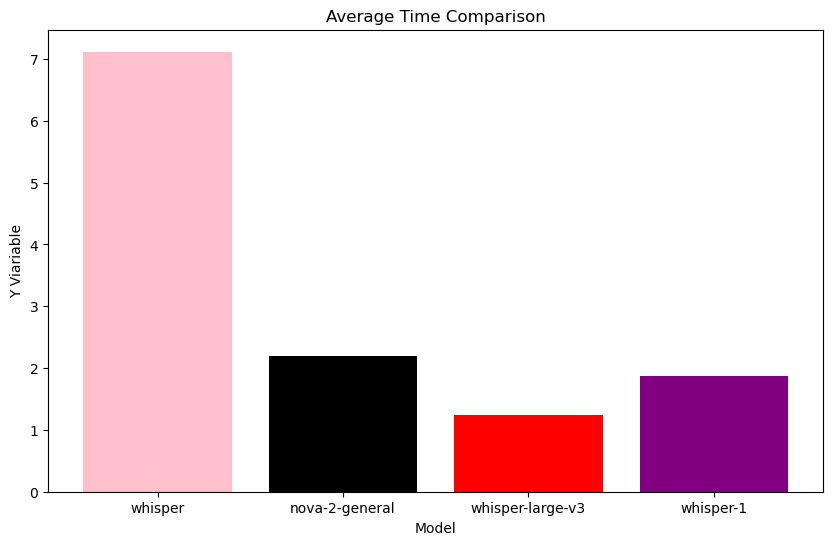

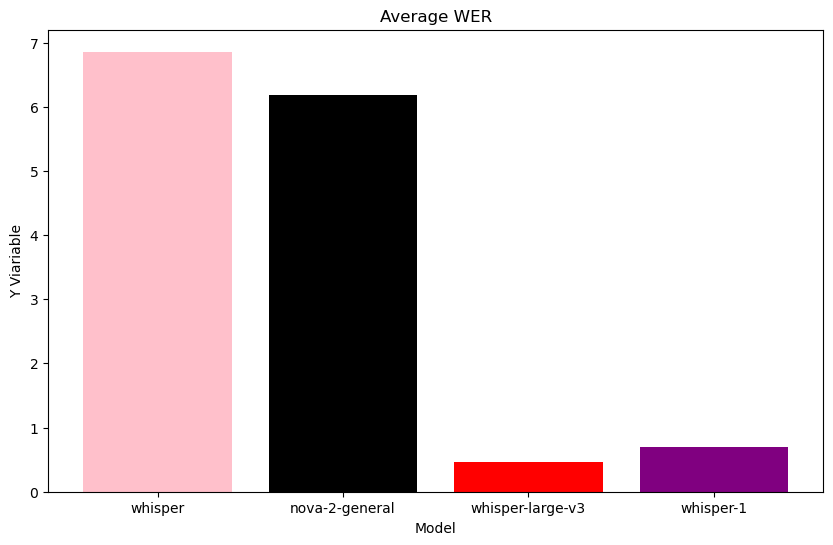

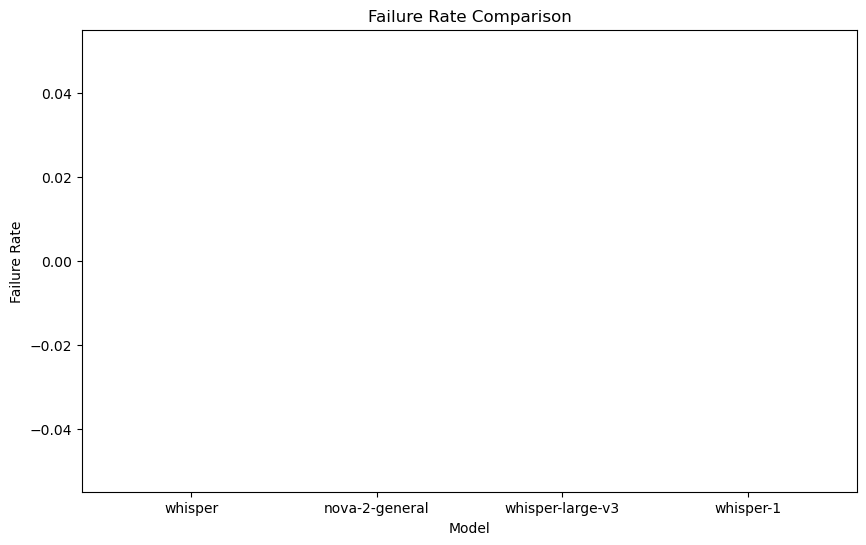

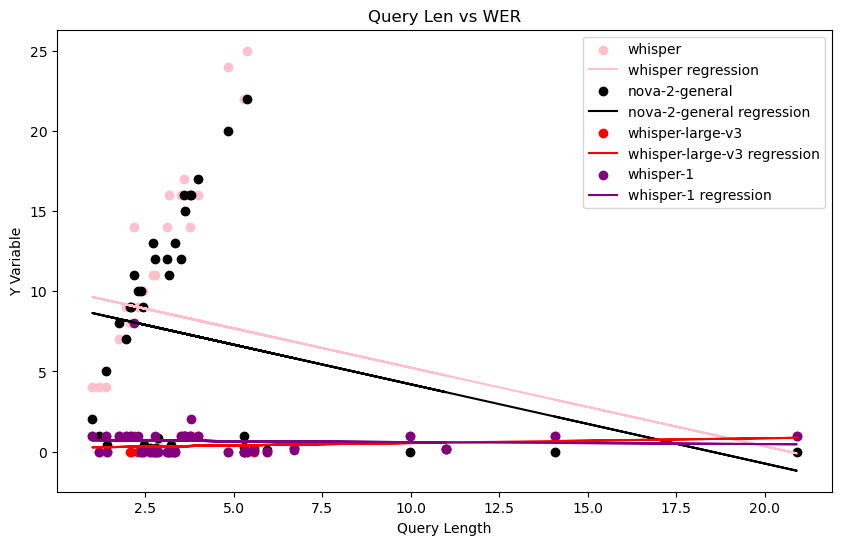

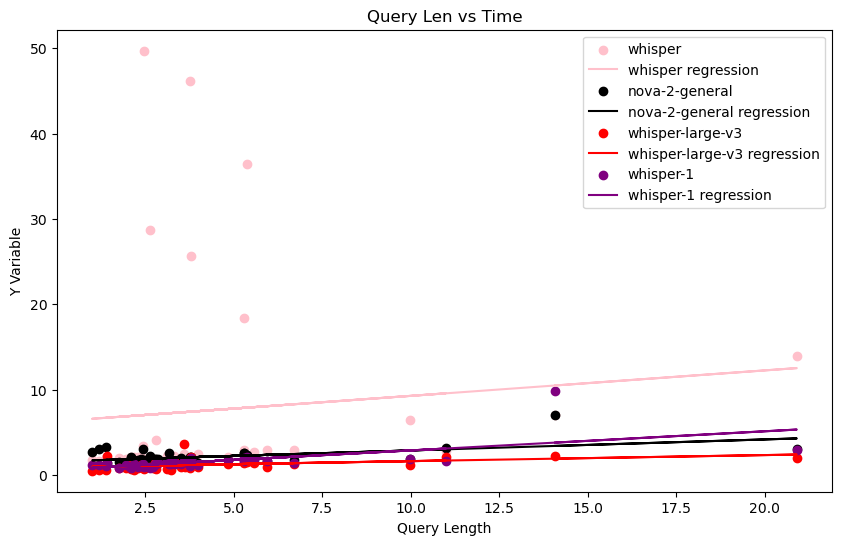

Model: whisper
Average time: 7.116141641841216
Average wer: 6.856422251015677
Fail rate: 0.0
Overall query: 277.232
Model: nova-2-general
Average time: 2.199721504660214
Average wer: 6.178551102556294
Fail rate: 0.0
Overall query: 277.232
Model: whisper-large-v3
Average time: 1.2456307551440071
Average wer: 0.4641339869281046
Fail rate: 0.0
Overall query: 277.232
Model: whisper-1
Average time: 1.8660491260827756
Average wer: 0.694862552864283
Fail rate: 0.0
Overall query: 277.232


In [3]:
# main testing function
results = []
for model in models:
    client = openai_client if "-1" in model else groq_client
    result = stt_test(local_audios, testing_texts, client, model)
    results.append(result)
    print(f"Finished testing {model}, waiting for 1 second...")
    time.sleep(1)


plot_model_comparison(results)
for result in results:
    print(f"Model: {result['model']}")
    print(f"Average time: {result['avg_time']}")
    print(f"Average wer: {result['avg_wer']}")
    print(f"Fail rate: {result['fail'] / (result['fail'] + result['success'])}")
    print(f"Overall query: {result['overall_query']}")